#  Hierarchical Clustering - Agglomerative

We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>


In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

# Clustering on Vehicle dataset

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacture to make decision about new models simply.

This assignment (except the dataset taken from kaggle) was prepared by Saeed aghabozorgi and can be found in the Machine learning with Python IBM in coursera.

Kaggle: Context
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Content
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

## Read data

In [2]:
data = pd.read_csv('Automobile_data.csv')

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Data Cleaning

In [4]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
data.rename(columns={
        'normalized-losses':'normalized_losses',
        'fuel-type':'fuel_type',
        'num_of_doors': 'num_of_doors',
        'body-style':'body_style',
        'drive-wheels':'drive_wheels',
        'engine-location':'engine_location',
        'wheel-base':'wheel_base',
        'curb-weight':'curb_weight',
        'engine-type':'engine_type',
        'num-of-cylinders':'num_of_cylinders',
        'engine-size':'engine_size',
        'fuel-system':'fuel_system',
        'compression-ratio':'compression_ratio',
        'peak-rpm':'peak_rpm',
        'city-mpg':'city_mpg',
        'highway-mpg':'highway_mpg'
            }, inplace=True)
#rename variables to be able to analyse

In [7]:
data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num-of-doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [8]:
data.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized_losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel_type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body_style,convertible,convertible,hatchback,sedan,sedan
drive_wheels,rwd,rwd,rwd,fwd,4wd
engine_location,front,front,front,front,front
wheel_base,88.6,88.6,94.5,99.8,99.4


In [9]:
# Find out number of records having '?' value for normalized losses
data.normalized_losses.loc[data['normalized_losses']== '?'].count()

41

In [10]:
data["normalized_losses"] = data["normalized_losses"].str.replace("?", "")#repalce? with null to be able to reolace with median

In [11]:
data.normalized_losses=pd.to_numeric(data.normalized_losses)#change the data type

In [12]:
#fillout the null values with median 
data.normalized_losses=data.normalized_losses.fillna(data.normalized_losses.median())
data.normalized_losses.value_counts()

115.0    44
161.0    11
91.0      8
150.0     7
104.0     6
134.0     6
128.0     6
74.0      5
85.0      5
103.0     5
168.0     5
95.0      5
102.0     5
65.0      5
94.0      5
122.0     4
118.0     4
93.0      4
148.0     4
106.0     4
125.0     3
154.0     3
137.0     3
101.0     3
83.0      3
81.0      2
188.0     2
192.0     2
158.0     2
110.0     2
164.0     2
145.0     2
113.0     2
87.0      2
89.0      2
119.0     2
194.0     2
108.0     2
153.0     2
129.0     2
197.0     2
142.0     1
256.0     1
77.0      1
90.0      1
98.0      1
121.0     1
78.0      1
231.0     1
186.0     1
107.0     1
Name: normalized_losses, dtype: int64

In [13]:
data.horsepower.loc[data['horsepower']== '?'].count()

2

In [14]:
data["horsepower"] = data["horsepower"].str.replace("?", "")#repalce? with null to be able to replace with median

In [15]:
data.horsepower=pd.to_numeric(data.horsepower)#change the data type

In [16]:
#fillout the null values with median 
data.horsepower=data.horsepower.fillna(data.horsepower.median())

In [17]:
data.horsepower.value_counts()

68.0     19
70.0     11
69.0     10
95.0      9
116.0     9
110.0     8
88.0      6
114.0     6
160.0     6
101.0     6
62.0      6
82.0      5
84.0      5
97.0      5
76.0      5
145.0     5
102.0     5
86.0      4
123.0     4
111.0     4
92.0      4
121.0     3
73.0      3
152.0     3
207.0     3
85.0      3
90.0      3
182.0     3
100.0     2
112.0     2
176.0     2
161.0     2
156.0     2
56.0      2
52.0      2
155.0     2
184.0     2
162.0     2
94.0      2
48.0      1
140.0     1
115.0     1
154.0     1
200.0     1
58.0      1
60.0      1
78.0      1
262.0     1
135.0     1
288.0     1
64.0      1
120.0     1
72.0      1
134.0     1
175.0     1
143.0     1
55.0      1
142.0     1
106.0     1
Name: horsepower, dtype: int64

In [18]:
data.price.loc[data['price']== '?'].count()
data["price"] = data["price"].str.replace("?", "")#repalce? with null to be able to replace with median
data.price=pd.to_numeric(data.price)#change the data type
#fillout the null values with median 
data.price=data.horsepower.fillna(data.price.median())
data.price.value_counts()

68.0     19
70.0     11
69.0     10
95.0      9
116.0     9
110.0     8
88.0      6
114.0     6
160.0     6
101.0     6
62.0      6
82.0      5
84.0      5
97.0      5
76.0      5
145.0     5
102.0     5
86.0      4
123.0     4
111.0     4
92.0      4
121.0     3
73.0      3
152.0     3
207.0     3
85.0      3
90.0      3
182.0     3
100.0     2
112.0     2
176.0     2
161.0     2
156.0     2
56.0      2
52.0      2
155.0     2
184.0     2
162.0     2
94.0      2
48.0      1
140.0     1
115.0     1
154.0     1
200.0     1
58.0      1
60.0      1
78.0      1
262.0     1
135.0     1
288.0     1
64.0      1
120.0     1
72.0      1
134.0     1
175.0     1
143.0     1
55.0      1
142.0     1
106.0     1
Name: price, dtype: int64

### Feature selection
Lets select our feature set:

In [19]:
feature_set = data[['engine_size',  'horsepower', 'wheel_base', 'width', 'length', 'curb_weight','highway_mpg','city_mpg']]

In [20]:
feature_set.dtypes

engine_size      int64
horsepower     float64
wheel_base     float64
width          float64
length         float64
curb_weight      int64
highway_mpg      int64
city_mpg         int64
dtype: object

### Normalization
Now we can normalize the feature set. __StandardScaler__ transforms features by scaling each feature to a range between  0 and  1. 

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(feature_set)
#print(Xs.values)


### Clustering using Scipy
In this part we use Scipy package to cluster the dataset:  
First, we calculate the distance matrix. 

In [22]:
import scipy
leng = Xs.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(Xs[i], Xs[j])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
    - single
    - complete
    - average
    - weighted
    - centroid
    
    
we use all methods to see the differences

In [23]:
import pylab
import scipy.cluster.hierarchy

In [24]:
Z = hierarchy.linkage(D, 'complete')

C:\Users\samra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


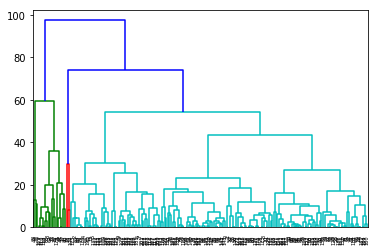

In [25]:
dendro1=hierarchy.dendrogram(Z)

Now we can calculate the cophenetic correlation coefficient to see how well our algorithm has measured the distances between the points:

In [26]:
c, coph_dists = cophenet(Z, pdist(Xs))

In [27]:
c

0.7414708596483988

In [28]:
Z1 = hierarchy.linkage(D, 'average')

C:\Users\samra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


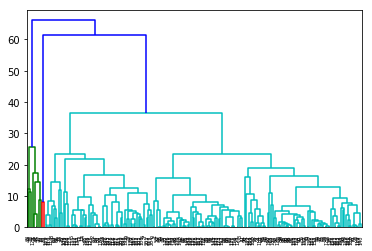

In [29]:
dendro2=hierarchy.dendrogram(Z1)

In [30]:
c1, coph_dists = cophenet(Z1, pdist(Xs))
c1

0.7921164702191525

In [31]:
Z2 = hierarchy.linkage(D, 'centroid')

C:\Users\samra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


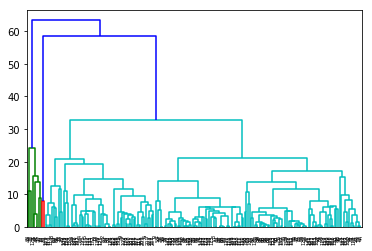

In [32]:
dendro3=hierarchy.dendrogram(Z2)

In [33]:
c2, coph_dists = cophenet(Z2, pdist(Xs))
c2

0.7886087989836698

In [34]:
Z3 = hierarchy.linkage(D, 'single')

C:\Users\samra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


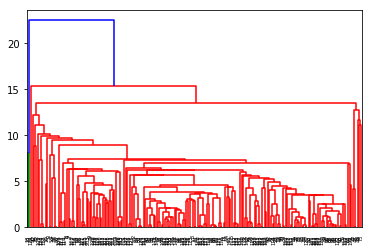

In [35]:
dendro4=hierarchy.dendrogram(Z3)

In [36]:
c3, coph_dists = cophenet(Z, pdist(Xs))
c3

0.7414708596483988

In [37]:
coph=[c,c1,c2,c3]
print(coph)

[0.7414708596483988, 0.7921164702191525, 0.7886087989836698, 0.7414708596483988]


It seems "average" is the best option

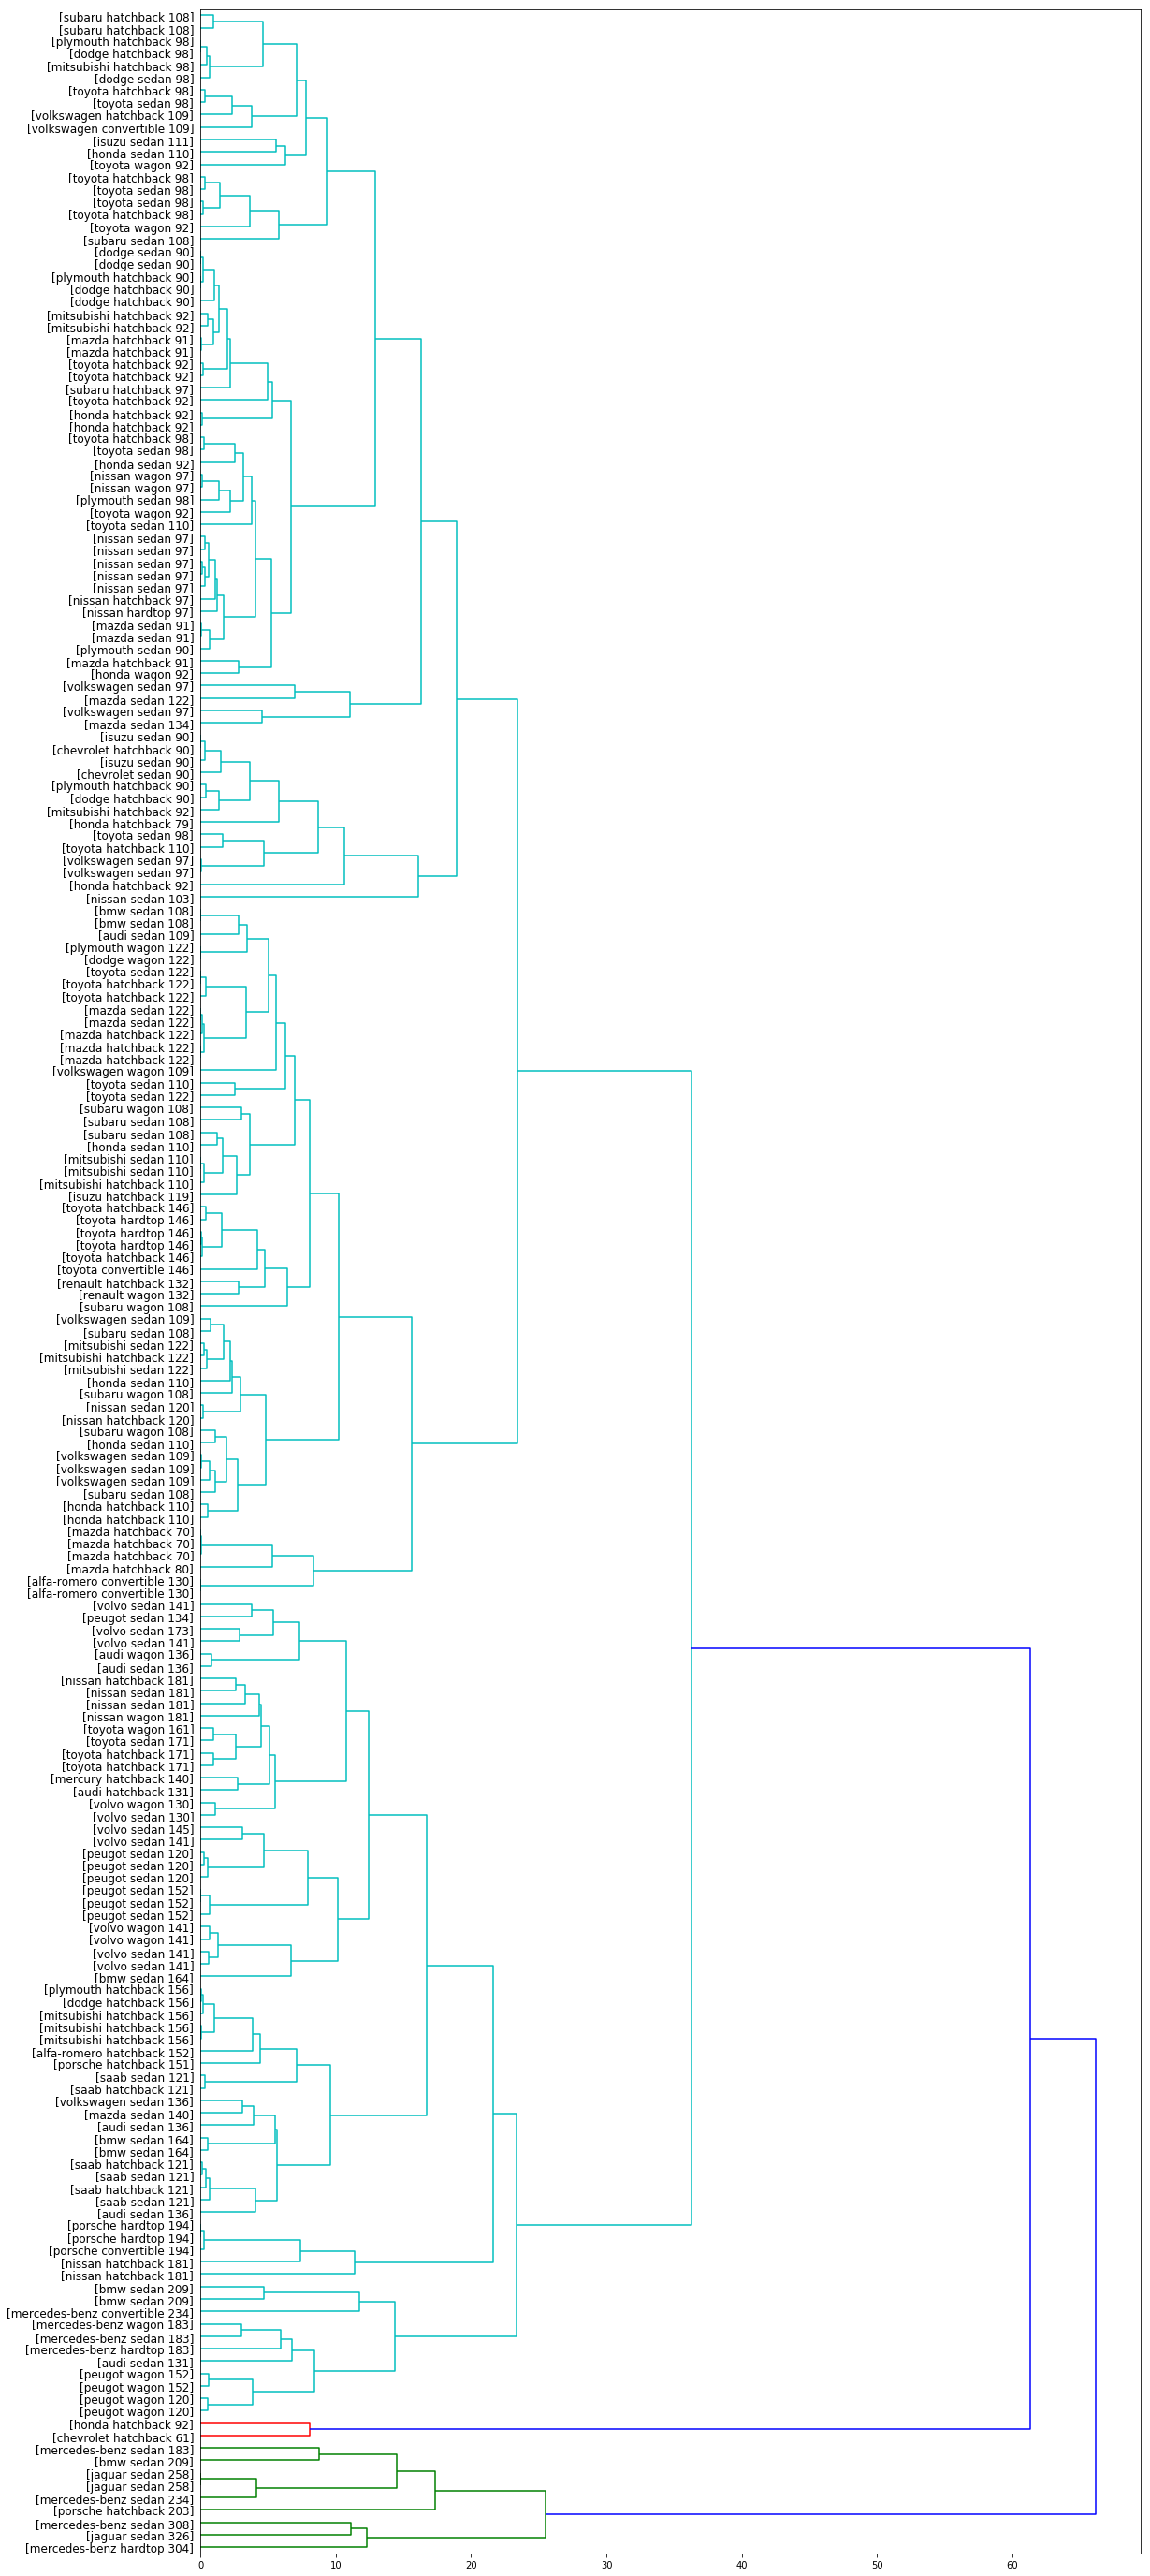

In [38]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data['make'][id], data['body_style'][id], data['engine_size'][id]) 
    
dendro = hierarchy.dendrogram(Z1,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering.
So you can use a cutting line:

In [39]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z1, max_d, criterion='distance')
clusters

array([49, 49, 31, 65, 28, 24, 45, 45, 16, 40, 65, 65, 25, 25, 34, 17, 18,
        6,  9, 70, 70, 69, 84, 94, 84, 84, 84, 94, 64, 30, 10, 72, 71, 83,
       83, 81, 78, 52, 52, 52, 89, 58, 53, 90, 70, 70, 58,  4,  4,  1, 78,
       84, 84, 79, 79, 50, 50, 50, 51, 62, 62, 62, 62, 76, 62, 26, 74, 13,
       14, 15,  7,  5, 19,  2,  3, 40, 69, 84, 84, 94, 58, 53, 30, 30, 30,
       53, 53, 58, 58, 79, 73, 79, 79, 80, 79, 79, 79, 80, 79, 53, 53, 42,
       44, 43, 22, 21, 42, 36, 35, 11, 12, 36, 35, 11, 12, 36, 35, 47, 69,
       94, 84, 79, 80, 64, 30, 32, 20, 20, 20,  8, 54, 54, 23, 23, 23, 23,
       29, 29, 84, 95, 95, 88, 52, 53, 59, 58, 52, 53, 60, 57, 85, 84, 84,
       80, 87, 91, 81, 81, 82, 68, 68, 86, 86, 86, 86, 92, 92, 55, 55, 55,
       55, 55, 56, 61, 61, 63, 63, 63, 41, 41, 41, 41, 67, 52, 67, 52, 52,
       77, 53, 93, 92, 27, 75, 66, 33, 33, 33, 33, 39, 39, 37, 46, 46, 38,
       48], dtype=int32)

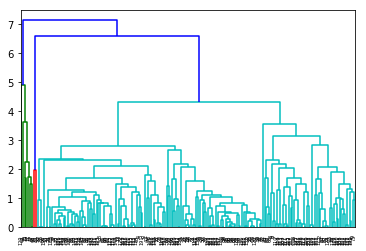

In [40]:
from scipy import cluster
ZZ = cluster.hierarchy.average(Xs)
cluster.hierarchy.dendrogram(ZZ);

Also, you can determine the number of clusters directly:

In [41]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters_5 = fcluster(Z1, k, criterion='maxclust')
clusters_5

array([5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 2, 3, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 2, 2, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 4, 4, 4, 2, 2, 4, 1, 1, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 2, 5, 5,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4], dtype=int32)

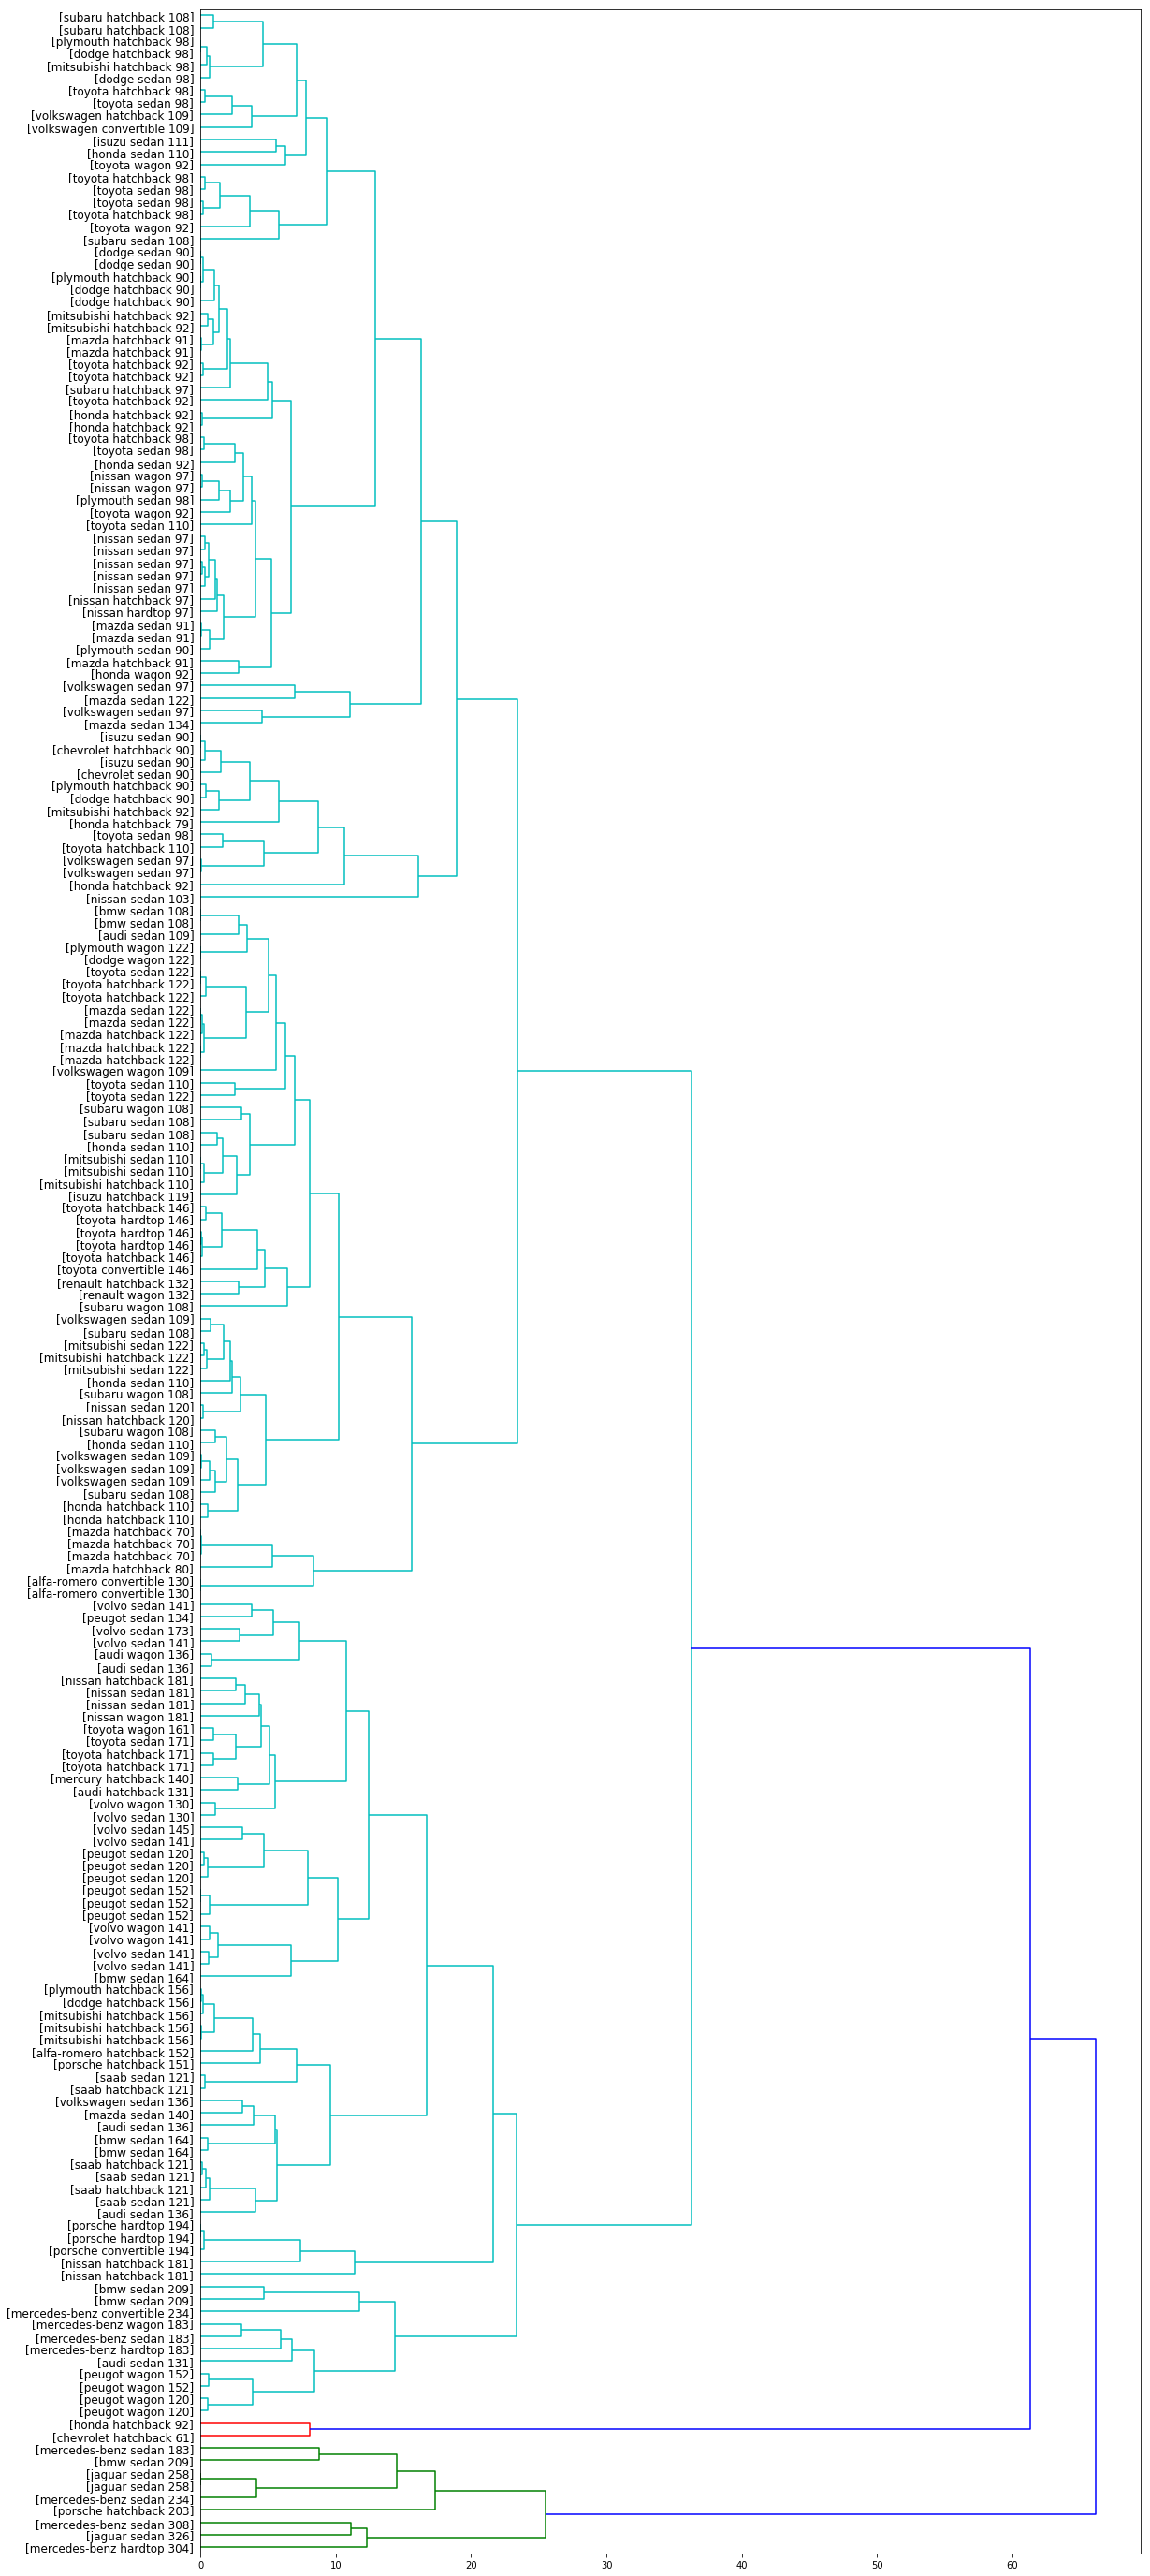

In [42]:
fig = pylab.figure(figsize=(18,50))
def llf1(id):
    return '[%s %s %s]' % (data['make'][id], data['body_style'][id], data['engine_size'][id]) 
    
dendro1 = hierarchy.dendrogram(Z1,  leaf_label_func=llf1, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Clustering using scikit-learn
Lets redo it again, but this time using scikit-learn package:

In [43]:
dist_matrix = distance_matrix(Xs,Xs) 
print(dist_matrix)

[[0.         0.         1.81540002 ... 4.69874748 4.65945983 4.53343537]
 [0.         0.         1.81540002 ... 4.69874748 4.65945983 4.53343537]
 [1.81540002 1.81540002 0.         ... 3.36689272 3.70590659 3.43635958]
 ...
 [4.69874748 4.69874748 3.36689272 ... 0.         1.71929998 0.98394248]
 [4.65945983 4.65945983 3.70590659 ... 1.71929998 0.         1.17248666]
 [4.53343537 4.53343537 3.43635958 ... 0.98394248 1.17248666 0.        ]]


Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [44]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
agglom.fit(Xs)
agglom.labels_

array([0, 0, 1, 0, 0, 0, 4, 4, 4, 1, 0, 0, 0, 0, 1, 1, 1, 3, 2, 2, 2, 2,
       5, 0, 5, 5, 5, 0, 0, 1, 2, 5, 2, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 3, 3, 3, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 3, 3, 3, 3, 1, 2, 5, 5, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 5, 5, 5, 0, 1, 1, 1, 1, 1, 3, 0, 0,
       0, 0, 0, 0, 1, 1, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5,
       5, 0, 5, 5, 5, 2, 2, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       1, 1, 4, 4, 4, 4, 4], dtype=int64)

In [45]:
agglom.fit_predict(Xs)

array([0, 0, 1, 0, 0, 0, 4, 4, 4, 1, 0, 0, 0, 0, 1, 1, 1, 3, 2, 2, 2, 2,
       5, 0, 5, 5, 5, 0, 0, 1, 2, 5, 2, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 3, 3, 3, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 3, 3, 3, 3, 1, 2, 5, 5, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 5, 5, 5, 0, 1, 1, 1, 1, 1, 3, 0, 0,
       0, 0, 0, 0, 1, 1, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5,
       5, 0, 5, 5, 5, 2, 2, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       1, 1, 4, 4, 4, 4, 4], dtype=int64)

In [46]:
data['cluster_'] = agglom.labels_
data.head(20)

,symboling,normalized_losses,make,fuel_type,aspiration,num-of-doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,cluster_
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000,21,27,111.0,0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000,21,27,111.0,0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000,19,26,154.0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102.0,5500,24,30,102.0,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115.0,5500,18,22,115.0,0
5,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,8.5,110.0,5500,19,25,110.0,0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.4,8.5,110.0,5500,19,25,110.0,4
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.4,8.5,110.0,5500,19,25,110.0,4
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.4,8.3,140.0,5500,17,20,140.0,4
9,0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.4,7.0,160.0,5500,16,22,160.0,1


Text(0,0.5,'city_mpg')

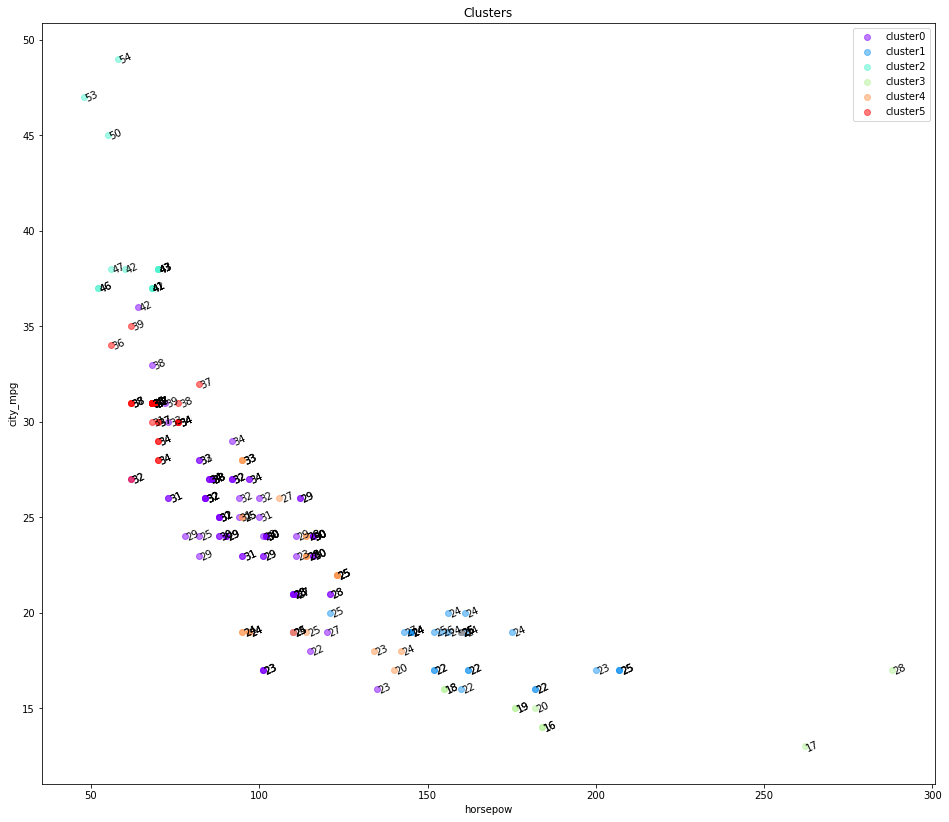

In [47]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster_== label]
    for i in subset.index:
            plt.text(subset.horsepower[i], subset.city_mpg[i],subset.highway_mpg[i], rotation=25) 
    plt.scatter(subset.horsepower, subset.city_mpg,c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('city_mpg')

As you can see, we are seeing the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. 

In [48]:
data.groupby(['cluster_','body_style'])['cluster_'].count()

cluster_  body_style 
0         convertible     4
          hardtop         3
          hatchback      27
          sedan          39
          wagon           9
1         convertible     1
          hardtop         2
          hatchback      15
          sedan           8
          wagon           3
2         hatchback       8
          sedan           8
3         convertible     1
          hardtop         1
          hatchback       1
          sedan           6
4         hardtop         1
          sedan          18
          wagon           8
5         hardtop         1
          hatchback      19
          sedan          17
          wagon           5
Name: cluster_, dtype: int64

Now we can look at the characterestics of each cluster:

In [49]:
agg_cars = data.groupby(['cluster_'])['horsepower','engine_size','highway_mpg','price','city_mpg'].mean()
agg_cars

,horsepower,engine_size,highway_mpg,price,city_mpg
cluster_,,,,,
0,96.926829,116.207317,30.195122,96.926829,24.378049
1,162.655172,164.827586,24.034483,162.655172,18.241379
2,62.687500,91.625000,45.125000,62.687500,39.312500
3,195.777778,259.333333,19.000000,195.777778,15.000000
4,112.370370,145.703704,26.037037,112.370370,21.814815
5,68.809524,94.595238,36.547619,68.809524,30.690476


Text(0,0.5,'mpg')

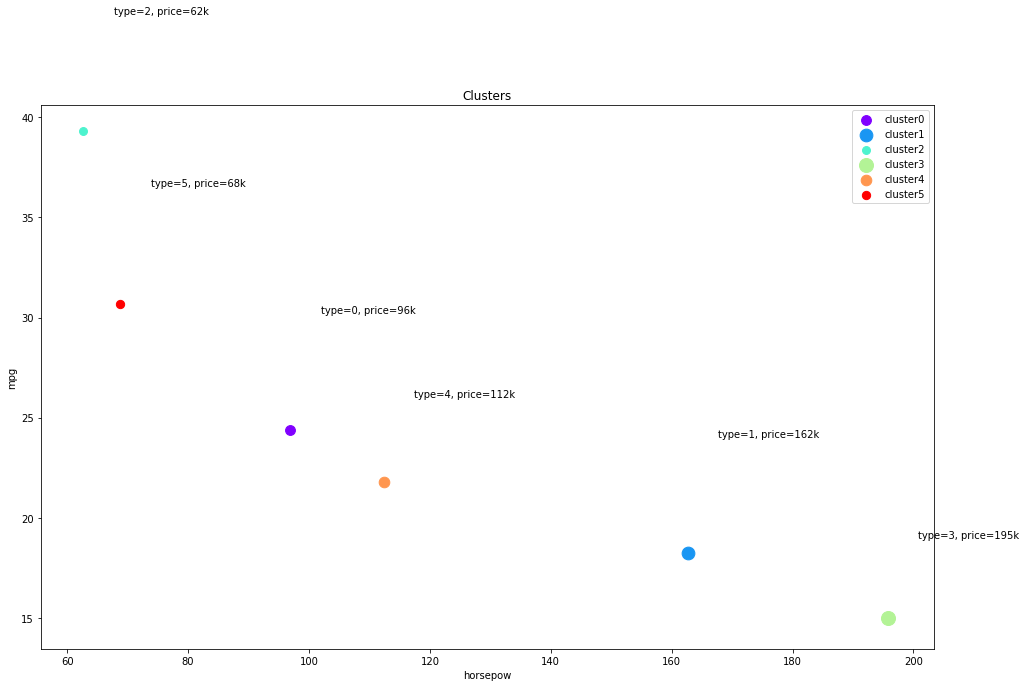

In [50]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepower, subset.city_mpg, s=subset.price, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

It is obvious that we have 3 main clusters with the majority of vehicles in those.

__Cars__:
- Cluster 1: with almost high mpg, and low in horsepower.
- Cluster 2: with good mpg and horsepower, but higher price than average.
- Cluster 3: with low mpg, high horsepower, highest price.
